## Starter file for assignment on Exploratory Data Analysis
### Author: Minh Nam Nguyen

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [3]:
data = pd.read_csv("winequality.csv")
df = pd.DataFrame(data)

# df.head()
df.sort_index()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# View the first 5 rows
print(df.head())

# Check the shape of the DataFrame
print(df.shape)

# Get summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Get information about data types
print(df.info())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# 1) Display Correlation Matrix

In [5]:
corr_matrix = data.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


* A correlation matrix provides insight to relationships between pairs of attribute. A high correlation means the attribute will tend to move together. A low correlation means the attributes will tend to move in the opposite way of each other.

* Using the colors on the correlation matrix, we can quickly identify which attribute pairs has a low or high correlation. 
    * RED  =  HIGH 
    * BLUE =  LOW  



# 2) Scatter Plot: Alcohol & pH

Text(0.5, 1.0, 'Scatter Plot of Alcohol & pH')

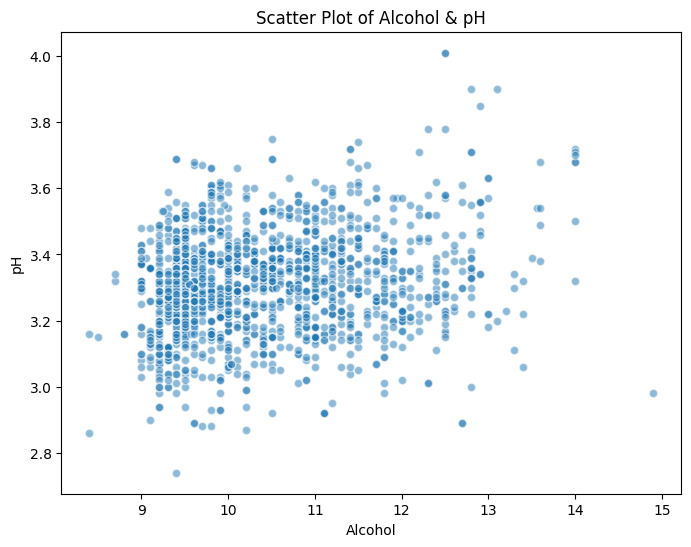

In [6]:
x = df['alcohol']
y = df['pH']

plt.figure(figsize=(8, 6))  
plt.scatter(x, y, alpha=0.5, edgecolors='w')  # alpha controls the transparency

plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.title('Scatter Plot of Alcohol & pH')

# plt.show()

* From what I can tell from the scatter plot, alcohol and pH has a slightly positive correlation. We can see that as the values for both attributes increases, there is a slight positive trend. 

* Correlation Matrix Value = 0.205633	

# 3) Scatter Plot: Residual Sugar & pH

Text(0.5, 1.0, 'Scatter Plot of Residual Sugar & pH')

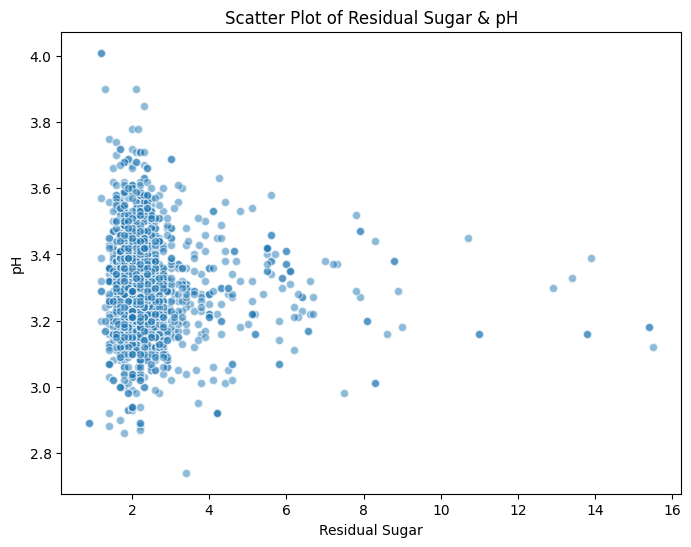

In [7]:
x = df['residual sugar']
y = df['pH']

plt.figure(figsize=(8, 6))  
plt.scatter(x, y, alpha=0.5, edgecolors='w')  # alpha controls the transparency

plt.xlabel('Residual Sugar')
plt.ylabel('pH')
plt.title('Scatter Plot of Residual Sugar & pH')

* According to the scatter plot for Residual Sugar & pH, the relationship seems weak. The values tend to be opposite from each other but this is very miniscule. From the data, it seems to be a slightly negative correlation

* Correlation Matrix Value = -0.085652	


# 4) Scatter Plot: Fixed Acidity & Citric Acid

Text(0.5, 1.0, 'Scatter Plot of fixed acidity & citric acid')

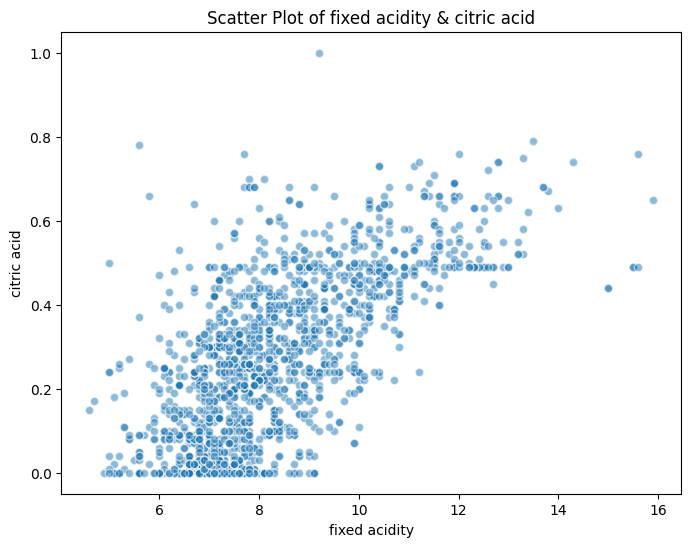

In [8]:
x = df['fixed acidity']
y = df['citric acid']

plt.figure(figsize=(8, 6))  
plt.scatter(x, y, alpha=0.5, edgecolors='w')  # alpha controls the transparency

plt.xlabel('fixed acidity')
plt.ylabel('citric acid')
plt.title('Scatter Plot of fixed acidity & citric acid')

* There seems to be a positive trend with the correlation of acidity & citric acid. So far, the relationship between these two attritutes has been the strongest when compared to the previous attributes.

* Correlation Matrix Value = 0.671703

# 5) Histogram: Quality

Text(0.5, 1.0, 'Frequency of Quality values')

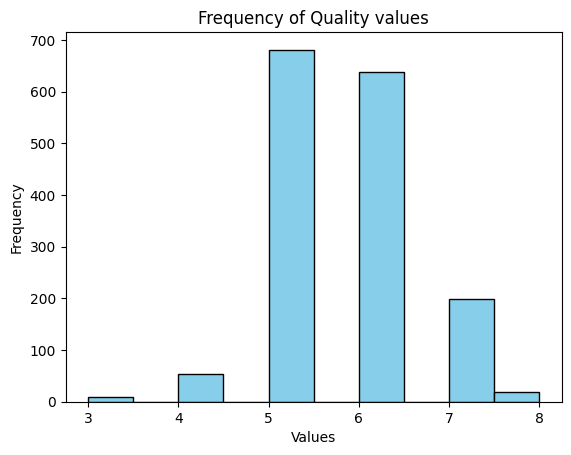

In [9]:
x = df['quality']

plt.hist(x, color='skyblue', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency of Quality values')


* Looking at the histogram, we can tell the frequency of each values for quality. We can see that 5 and 6 are the most common when it comes to quality in this dataset. Even though 5, which is considered bad, is the most prominent value -- when considering the whole dataset, we will get more have a slightly higher chance of getting a good quality wine.

# 6) Box Plot: alcohol attribute for the instances of the quality classes 

In [10]:
# np.where(condition, x, y) --> if condition == true return x else y
df['quality_label'] = np.where(df['quality'] <= 5, 'Bad', 'Good') 
print(df.head())

# df['quality_label'] = df['quality'].apply(lambda x: 'Bad' if x <= 5 else 'Good')
# print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality quality_label  
0      9.4        5           Bad  
1      9.8    

/var/folders/jw/plp7h3rx77nby1bttx42xypw0000gn/T/ipykernel_905/1273279172.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([alcohol_bad, alcohol_good, alcohol_all], labels=['Bad', 'Good', 'All'])


Text(0.5, 0, 'Quality Classes')

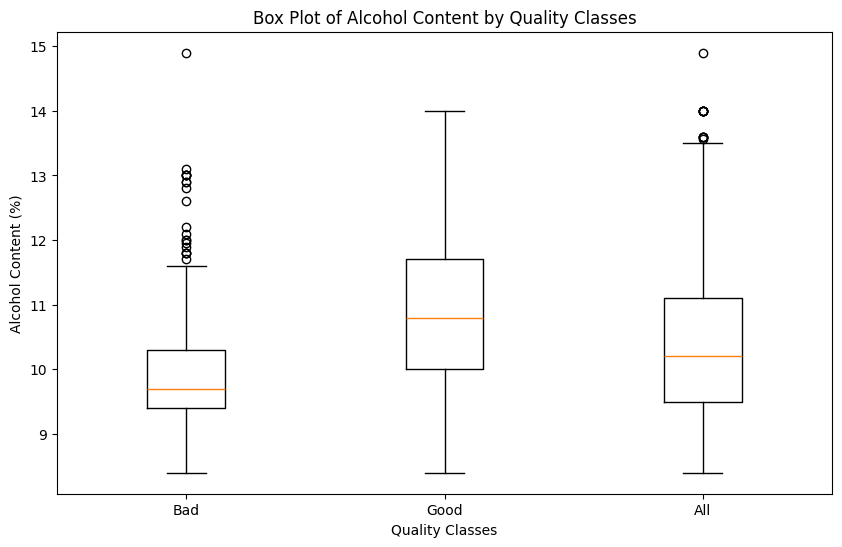

In [11]:
# Separate the alcohol data for 'Bad', 'Good', and all instances
alcohol_bad = df[df['quality_label'] == 'Bad']['alcohol']
alcohol_good = df[df['quality_label'] == 'Good']['alcohol']
alcohol_all = df['alcohol']

# Create the box plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Plotting the data
plt.boxplot([alcohol_bad, alcohol_good, alcohol_all], labels=['Bad', 'Good', 'All'])

# Add title and labels
plt.title('Box Plot of Alcohol Content by Quality Classes')
plt.ylabel('Alcohol Content (%)')
plt.xlabel('Quality Classes')

* From looking at the box plot of alcohol content by quality classes, we can determine that wine with a higher alcohol content will tend to have a higher quality. The difference is not significant but wine quality will tend to have a higher quality when it contains at least 10% alcohol content.

# 7) Box Plot: pH attribute for the instances of the quality classes 

/var/folders/jw/plp7h3rx77nby1bttx42xypw0000gn/T/ipykernel_905/2009669616.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pH_bad, pH_good, pH_all], labels=['Bad', 'Good', 'All'])


Text(0.5, 0, 'Quality Classes')

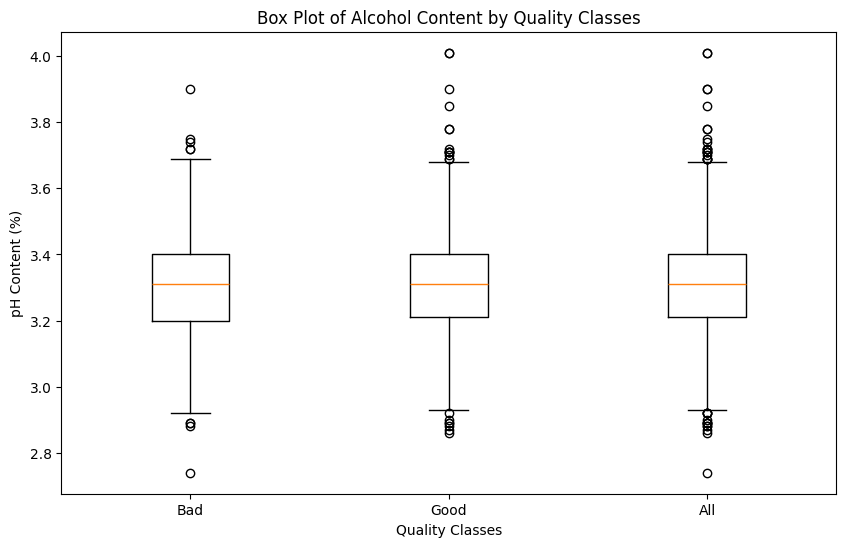

In [15]:
# Separate the alcohol data for 'Bad', 'Good', and all instances
pH_bad = df[df['quality_label'] == 'Bad']['pH']
pH_good = df[df['quality_label'] == 'Good']['pH']
pH_all = df['pH']

# Create the box plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Plotting the data
plt.boxplot([pH_bad, pH_good, pH_all], labels=['Bad', 'Good', 'All'])

# Add title and labels
plt.title('Box Plot of Alcohol Content by Quality Classes')
plt.ylabel('pH Content (%)')
plt.xlabel('Quality Classes')

* From the data of the box plot -- there is not much of a difference when comparing quality to pH. The pH levels of the wine seems to not correlate to the quality of wine. As we can see from the data, the box plot location seems nearly identical. This tells us that pH levels does not have a strong relationship with wine quality levels.

# 8) Create supervised scatter plots for the following 3 pairs of attributes using quality as a class variable: alcohol / pH, residual sugar / pH, and fixed acidity / free sulfur dioxide. Use different colors for the class variable. Interpret the obtained plots and address what can be said about the difficulty in predicting the quality and the distribution of the instances of the three classes. Identify the best pair of attributes based on the generated supervised scatter plots.

* Notes to remember:
    - The quality class variable has already been defined above -- which was used for the box plot -- we will be using the same quality class variable for the steps below

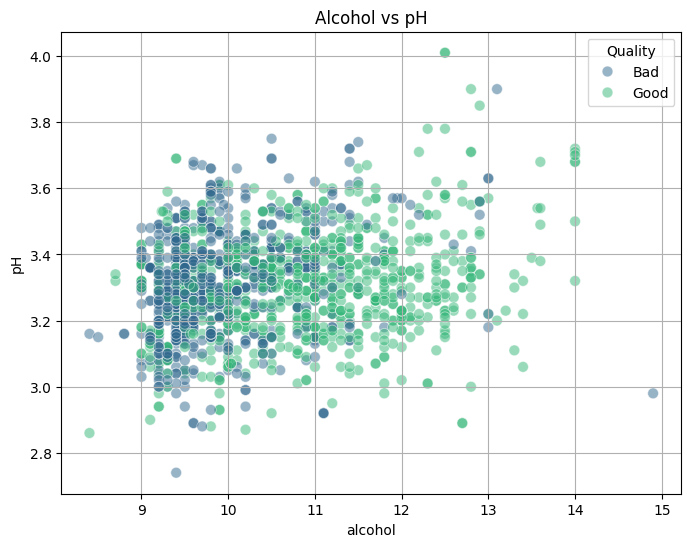

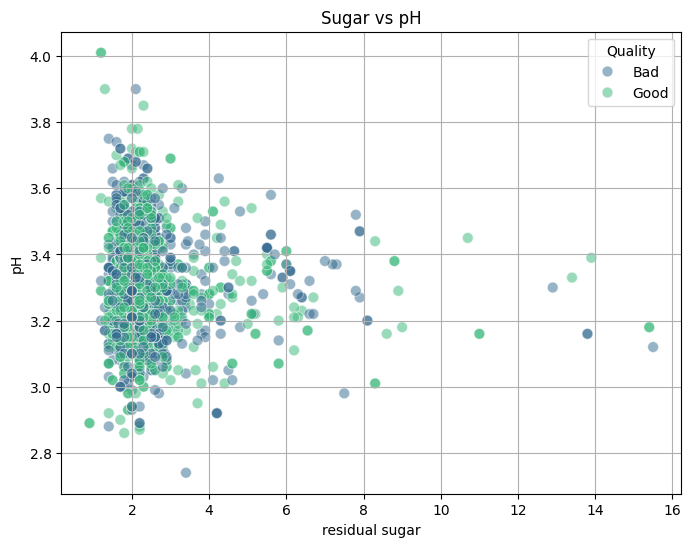

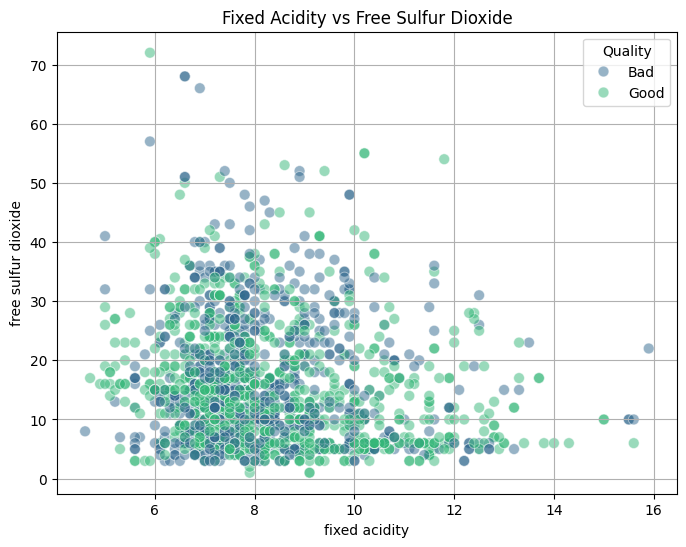

In [16]:
# df['quality_label'] = np.where(df['quality'] <= 5, 'Bad', 'Good') --> This is here for reference

# Creating scatter plots
def scatter_plot (x, y, label_column='quality_label', title='Scatter Plot'):
    plt.figure(figsize=(8,6))

    sns.scatterplot(data=df, x=x, y=y, hue=label_column, 
                    palette='viridis', s=60, edgecolor='w', alpha=0.5)
    
    plt.title(title)
    plt.ylabel(y)
    plt.xlabel(x)
    plt.legend(title='Quality')
    plt.grid(True)
    plt.show()


# Alcohol vs pH
scatter_plot('alcohol', 'pH', title='Alcohol vs pH')

# Sugar vs pH
scatter_plot('residual sugar', 'pH', title='Sugar vs pH')

# Fixed Acidity vs Free Sulfur Dioxide
scatter_plot('fixed acidity', 'free sulfur dioxide', title='Fixed Acidity vs Free Sulfur Dioxide')

# 9) Perform PCA on all of the attributes, reduce the dimension to 2 principal components (2D PCA), and create a supervised scatter plot on the 2 principal components. Then normalize all of the attributes with Z-Score and Min-Max normalization, perform 2D PCA on the normalized attributes, and create two supervised scatter plots, one for the 2 principal components of the Z-Score normalized attributes, another for the 2 principal components of the Min-Max normalized attributes. Tell the difference before and after normalization, infer the reason of any difference, tell which normalization method is better and why, interpret how PCA is useful and what are its benefits in this data analysis.